### Import Libraries

In [25]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

sns.set_style('darkgrid')

### Loading Dataset

In [2]:
df = pd.read_csv("./dataset/OnlineRetail.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Handling Missing Values

In [4]:
df = df[pd.notnull(df['CustomerID'])]

### Which country has how many customers?

In [10]:
filterd_df = df[['Country', 'CustomerID']].drop_duplicates()

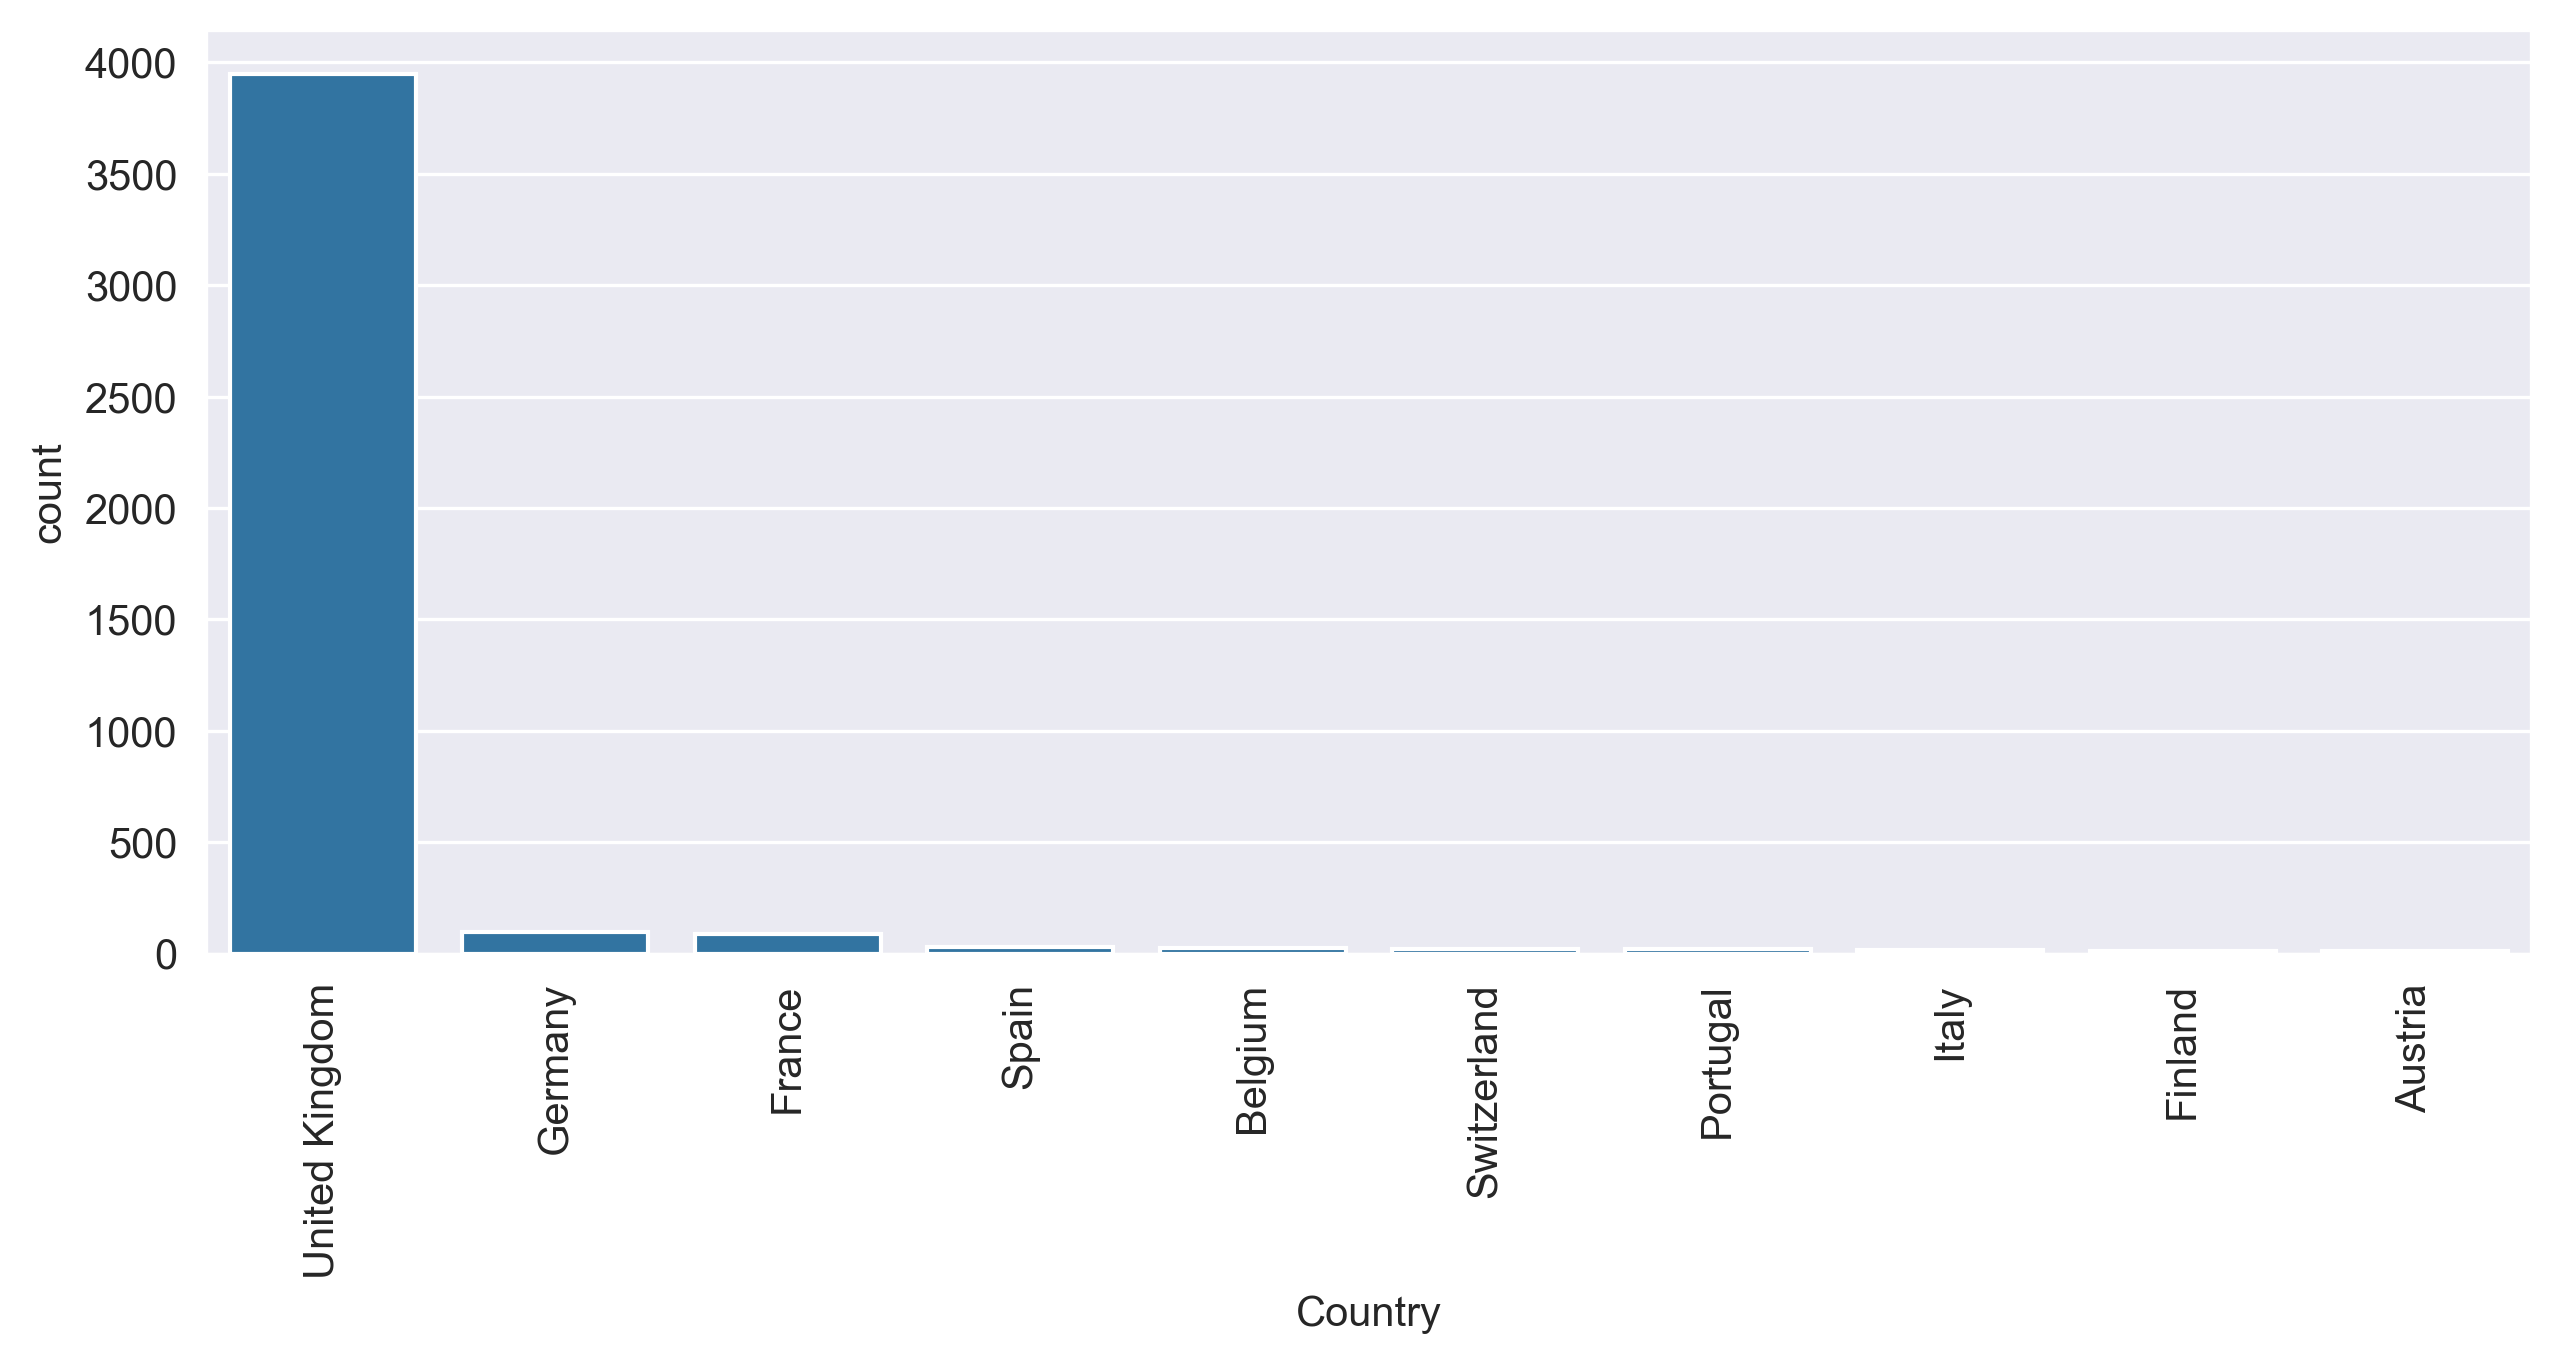

In [24]:
fig = plt.figure(figsize=(10, 4), dpi= 300)
ax = sns.barplot(data = filterd_df['Country'].value_counts()[:10]);
ax.tick_params(axis='x', rotation=90)

### RFM Analysis for United Kingdom

In [26]:
uk_df = df[df.Country == 'United Kingdom']

In [27]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [28]:
uk_df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
uk_df = uk_df[uk_df['Quantity']>0]

In [30]:
uk_df = uk_df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_df.head()


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,12/1/2010 8:26,536365,6,2.55
1,17850.0,12/1/2010 8:26,536365,6,3.39
2,17850.0,12/1/2010 8:26,536365,8,2.75
3,17850.0,12/1/2010 8:26,536365,6,3.39
4,17850.0,12/1/2010 8:26,536365,6,3.39


In [31]:
uk_df['InvoiceDate'].min(), uk_df['InvoiceDate'].max()

('1/10/2011 10:32', '9/9/2011 9:52')

In [32]:
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])

In [34]:
uk_df['InvoiceDate'].min(), uk_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [35]:
uk_df['TotalPrice'] = uk_df['Quantity'] * uk_df['UnitPrice']

In [60]:
PRESENT = dt.datetime(2011, 12, 10)

rfm = uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': 'count',
                                        'TotalPrice': 'sum'})

In [61]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [62]:
rfm.columns = ['recency', 'frequency', 'monetary'] 

In [63]:
rfm['recency'] = rfm['recency'].astype(int)

In [64]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [65]:
rfm['r_quartile'] = pd.qcut(x=rfm['recency'], q=4, labels=['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(x =rfm['frequency'], q=4, labels=['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(x=rfm['monetary'], q=4, labels=['4','3','2','1'])

In [66]:
rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [67]:
rfm['RFM_SCORE'] = rfm[['r_quartile', 'f_quartile', 'm_quartile']].astype(str).agg(''.join, axis = 1)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [69]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_SCORE']=='111'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_SCORE
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
